#  **"See truth. DetectAI."**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torchvision

In [4]:
import torch

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Using device: {device}")

✅ Using device: cuda


In [6]:
torchvision.__version__

'0.23.0+cu126'

# 1. Getting Dataset in Desired Formate

In [7]:
"""# --------------------------------------------------------------
# NOTE:
# This code was used to split the dataset into train/validation
# folders and copy images into them. Shutil.copy is slow for
# large datasets, so this was only used once to prepare data
# and is kept here for reference.
# --------------------------------------------------------------

from pathlib import Path
from sklearn.model_selection import train_test_split
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import shutil

# ------------------- Dataset paths -------------------
dataset_path = "/content/drive/MyDrive/DATASET"
fake_image_path = "/content/drive/MyDrive/DATASET/fake_cifake_images"
real_image_path = "/content/drive/MyDrive/DATASET/real_cifake_images"
test_path = "/content/drive/MyDrive/DATASET/test"

fake_dir = Path(fake_image_path)
real_dir = Path(real_image_path)

# ------------------- Collect all images -------------------
fake_images = list(fake_dir.glob("*.*"))
real_images = list(real_dir.glob("*.*"))

# ------------------- Train/Validation folder setup -------------------
train_dir = Path("data/train")
val_dir = Path("data/val")

fake_train = train_dir / "fake"
real_train = train_dir / "real"
fake_val = val_dir / "fake"
real_val = val_dir / "real"

# Create folders if they do not exist
for path in [fake_train, real_train, fake_val, real_val]:
    path.mkdir(parents=True, exist_ok=True)

# ------------------- Split the dataset -------------------
# Using 80% for training and 20% for validation
train_fake, val_fake = train_test_split(fake_images, test_size=0.2, random_state=42)
train_real, val_real = train_test_split(real_images, test_size=0.2, random_state=42)

# ------------------- Copy images to corresponding folders -------------------
for f in train_fake:
    shutil.copy(f, fake_train)

for f in val_fake:
    shutil.copy(f, fake_val)

for f in train_real:
    shutil.copy(f, real_train)

for f in val_real:
    shutil.copy(f, real_val)

# ------------------- Print dataset sizes for verification -------------------
print("Train Fake:", len(train_fake))
print("Validation Fake:", len(val_fake))
print("Train Real:", len(train_real))
print("Validation Real:", len(val_real))
"""

'# --------------------------------------------------------------\n# NOTE:\n# This code was used to split the dataset into train/validation\n# folders and copy images into them. Shutil.copy is slow for\n# large datasets, so this was only used once to prepare data\n# and is kept here for reference.\n# --------------------------------------------------------------\n\nfrom pathlib import Path\nfrom sklearn.model_selection import train_test_split\nfrom torchvision import transforms\nfrom torch.utils.data import Dataset, DataLoader\nfrom PIL import Image\nimport shutil\n\n# ------------------- Dataset paths -------------------\ndataset_path = "/content/drive/MyDrive/DATASET"\nfake_image_path = "/content/drive/MyDrive/DATASET/fake_cifake_images"\nreal_image_path = "/content/drive/MyDrive/DATASET/real_cifake_images"\ntest_path = "/content/drive/MyDrive/DATASET/test"\n\nfake_dir = Path(fake_image_path)\nreal_dir = Path(real_image_path)\n\n# ------------------- Collect all images --------------

In [8]:
# Now lets get the zip folder and extract!!!
from pathlib import Path
import zipfile


dataset_path = "/content/drive/MyDrive/deefFake_dataset.zip"
extract_folder = Path("dataset")

extract_folder.mkdir(parents=True, exist_ok=True)


with zipfile.ZipFile(dataset_path, "r") as zip_file:
  zip_file.extractall(extract_folder)

print(f"Dataset extracted to: {extract_folder}")

Dataset extracted to: dataset


In [9]:
train_dir = Path("/content/dataset/dataset/train")
val_dir = Path("/content/dataset/dataset/val")

# 2. Visualize the data

Class name: real
Height: 32
Width: 32


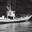

In [10]:
from PIL import Image
import matplotlib.pyplot as plt
import random

# random.seed(42) # I found this will not work here
# Creating image list path
image_path_list = list(train_dir.glob("*/*"))

# Selecting random image
random_image_path = random.choice(image_path_list)

# Creating class for random_image_path
random_image_class = random_image_path.parent.stem

# Plotting image
img = Image.open(random_image_path)

# Print metadeta
print(f"Class name: {random_image_class}")
print(f"Height: {img.height}")
print(f"Width: {img.width}")
img

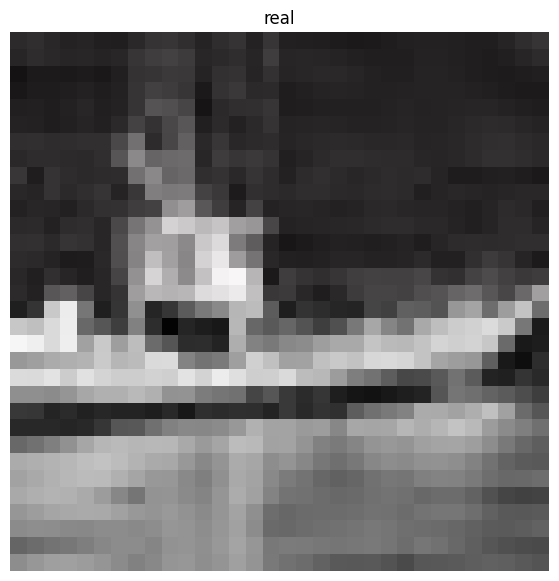

In [11]:
# Using matplotlib to plot
import matplotlib.pyplot as plt
import numpy as np

image_as_array = np.asarray(img)

plt.figure(figsize=(10, 7))
plt.imshow(image_as_array)
plt.title(random_image_class)
plt.axis(False);

# 3. Transforming Data

In [12]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [13]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])

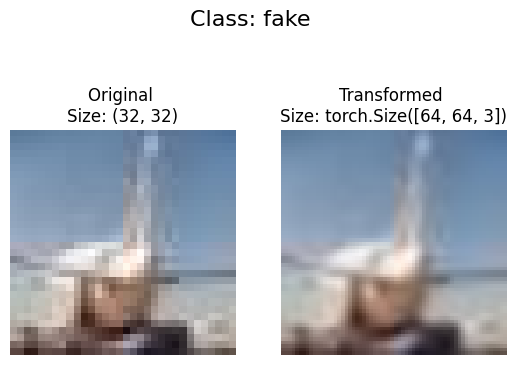

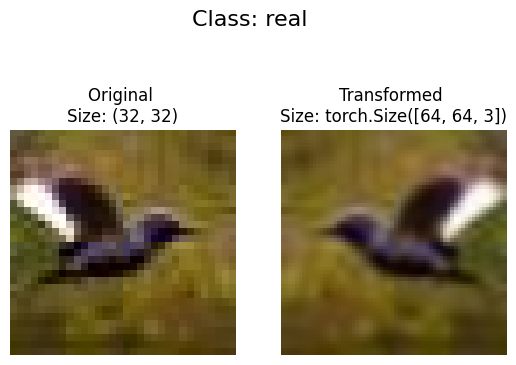

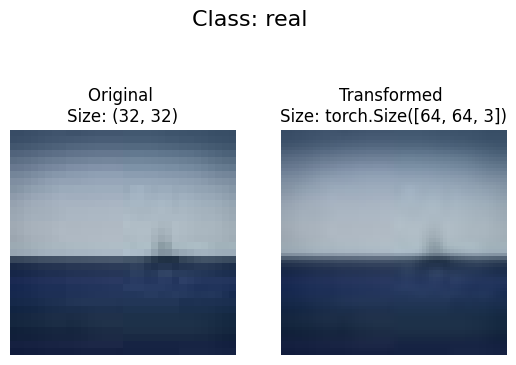

In [14]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

# 4. Loading Image using ImageFolder

In [15]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

val_data = datasets.ImageFolder(root=val_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{val_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 1600
    Root location: /content/dataset/dataset/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 400
    Root location: /content/dataset/dataset/val
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [16]:
# Get class names as a list
class_names = train_data.classes
class_names

['fake', 'real']

In [17]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'fake': 0, 'real': 1}

In [18]:
# Check the lengths
len(train_data), len(val_data)

(1600, 400)

In [19]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.3020, 0.3059, 0.3098,  ..., 0.3804, 0.3451, 0.3255],
         [0.2980, 0.3020, 0.3137,  ..., 0.3412, 0.3020, 0.2824],
         [0.2863, 0.2980, 0.3176,  ..., 0.2627, 0.2157, 0.1922],
         ...,
         [0.1961, 0.1961, 0.1922,  ..., 0.0667, 0.0627, 0.0627],
         [0.2078, 0.2078, 0.2039,  ..., 0.0902, 0.0980, 0.1020],
         [0.2118, 0.2118, 0.2078,  ..., 0.1020, 0.1137, 0.1216]],

        [[0.3176, 0.3255, 0.3451,  ..., 0.4235, 0.3882, 0.3686],
         [0.3137, 0.3216, 0.3490,  ..., 0.3843, 0.3451, 0.3216],
         [0.3020, 0.3176, 0.3529,  ..., 0.3059, 0.2549, 0.2314],
         ...,
         [0.1294, 0.1373, 0.1451,  ..., 0.0627, 0.0588, 0.0588],
         [0.1412, 0.1490, 0.1569,  ..., 0.0863, 0.0941, 0.0980],
         [0.1451, 0.1529, 0.1647,  ..., 0.0980, 0.1098, 0.1176]],

        [[0.3294, 0.3373, 0.3529,  ..., 0.4314, 0.3961, 0.3765],
         [0.3255, 0.3373, 0.3569,  ..., 0.3922, 0.3529, 0.3294],
         [0.3176, 0.3333, 0.3608,  ..., 0.31

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


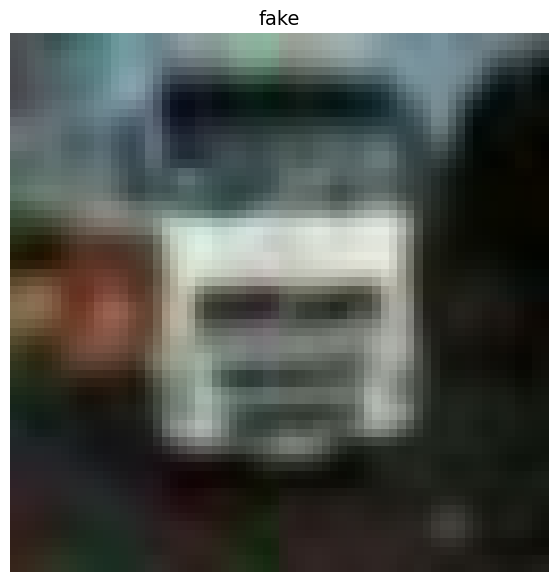

In [20]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

## 4.1 Turning Images into DataLoader

In [36]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=4, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

val_dataloader = DataLoader(dataset=val_data,
                             batch_size=4,
                             num_workers=1,
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, val_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x79edd44ac950>,
 <torch.utils.data.dataloader.DataLoader at 0x79edd44ae000>)

In [37]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([4, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([4])


# 5. Lets Train

## 5.1 Model 0

In [38]:
import torch
import torch.nn as nn

In [39]:
import torch
import torchvision

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pretrained GoogLeNet
googlenet_weights = torchvision.models.GoogLeNet_Weights.DEFAULT
model_0 = torchvision.models.googlenet(weights=googlenet_weights)

# Freeze all pretrained parameters
for param in model_0.parameters():
    param.requires_grad = False

# Replace the fully connected layer for your number of classes
model_0.fc = torch.nn.Linear(in_features=1024, out_features=2)

# Move the ENTIRE model (including new fc) to device
model_0 = model_0.to(device)


In [40]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metrics across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [41]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [42]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        # Ensure all data is moved to CPU and converted to float for storage
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [46]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=val_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.5859 | train_acc: 0.7031 | test_loss: 0.6088 | test_acc: 0.7150
Epoch: 2 | train_loss: 0.5711 | train_acc: 0.7281 | test_loss: 0.6896 | test_acc: 0.7200
Epoch: 3 | train_loss: 0.5982 | train_acc: 0.6887 | test_loss: 0.7535 | test_acc: 0.7175
Epoch: 4 | train_loss: 0.5883 | train_acc: 0.7087 | test_loss: 0.7817 | test_acc: 0.6650
Epoch: 5 | train_loss: 0.6107 | train_acc: 0.7119 | test_loss: 0.5996 | test_acc: 0.7200
Total training time: 37.323 seconds


In [47]:
model_0_results

{'train_loss': [0.5858637405745685,
  0.571055691037327,
  0.5981679223850369,
  0.5883356994204223,
  0.6106958162412047],
 'train_acc': [0.703125, 0.728125, 0.68875, 0.70875, 0.711875],
 'test_loss': [0.6088144728168845,
  0.6896281960234046,
  0.7534653805941344,
  0.7817450266703964,
  0.5996496671065689],
 'test_acc': [0.715, 0.72, 0.7175, 0.665, 0.72]}

# 6. Finalize the Model with Test

In [64]:
import torch
from typing import List
import torchvision
import matplotlib.pyplot as plt
from PIL import Image

def pred_and_plot_image(
    model: torch.nn.Module,
    image_path: str,
    class_names: List[str] = None,
    transform=None,
    device: torch.device = torch.device("cuda" if torch.cuda.is_available() else "cpu"),
):
    """Predicts on a target image with a trained model and plots it."""

    # 1. Load the image as PIL (works with pretrained transforms)
    target_image = Image.open(image_path).convert("RGB")

    # 2. Apply transforms if provided
    if transform:
        target_image_tensor = transform(target_image).unsqueeze(0)  # Add batch dim
    else:
        # fallback: convert to tensor and normalize to [0,1]
        target_image_tensor = torchvision.transforms.ToTensor()(target_image).unsqueeze(0)

    # 3. Send model and image to device
    model.to(device)
    target_image_tensor = target_image_tensor.to(device)

    # 4. Make prediction
    model.eval()
    with torch.inference_mode():
        pred_logits = model(target_image_tensor)
        pred_probs = torch.softmax(pred_logits, dim=1)
        pred_label = torch.argmax(pred_probs, dim=1).item()

    # 5. Plot
    plt.imshow(target_image)
    if class_names:
        title = f"Pred: {class_names[pred_label]} | Prob: {pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {pred_label} | Prob: {pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis("off")
    plt.show()


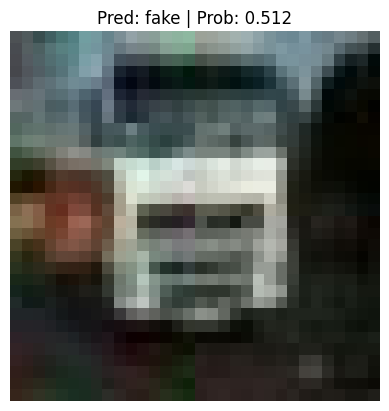

In [66]:
pred_and_plot_image(
    model=model_0,
    image_path="/content/dataset/dataset/train/fake/10.png",
    class_names=class_names,
    transform=data_transform,  # your pretrained transform
)


# 7. Save the model

In [70]:
import torch

# File path where you want to save the model
MODEL_PATH = "/content/detectAiFull.pth"

# Save only the model weights (recommended)
torch.save(model_0, MODEL_PATH)

print(f"Model saved to {MODEL_PATH}")


Model saved to /content/detectAiFull.pth


In [69]:
import torch
from PIL import Image
import os
import json

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_0.eval()
model_0.to(device)

transform = data_transform

# Folder with test images
test_folder = "/content/drive/MyDrive/DATASET/test"
test_images = sorted(os.listdir(test_folder))  # ensures consistent order

predictions = []

for idx, img_name in enumerate(test_images, start=1):  # start indexing at 1
    img_path = os.path.join(test_folder, img_name)
    image = Image.open(img_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0).to(device)  # use your transform

    with torch.no_grad():
        output = model_0(input_tensor)
        pred_class = torch.argmax(output, dim=1).item()
        pred_label = "real" if pred_class == 0 else "fake"  # adjust if needed

    predictions.append({
        "index": idx,
        "prediction": pred_label
    })

# Save JSON
with open("chaudharypriyanshu2425.json", "w") as f:
    json.dump(predictions, f, indent=4)

print("Predictions saved to chaudharypriyanshu2425.json")


Predictions saved to teamname_prediction.json
